ELEG815 HW 8 Programming problem       
J. Cristiano       
11/6/2024    


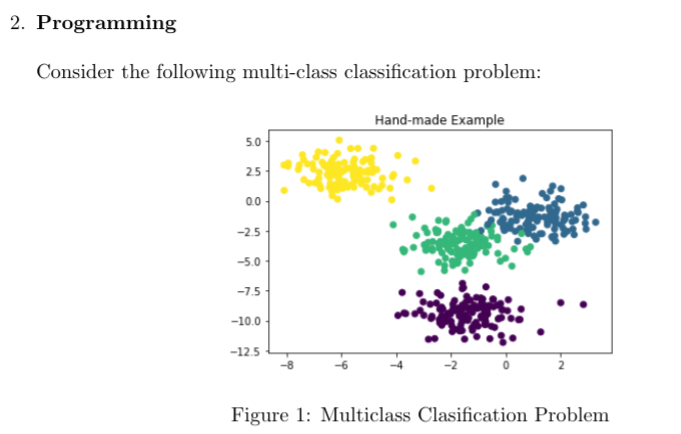
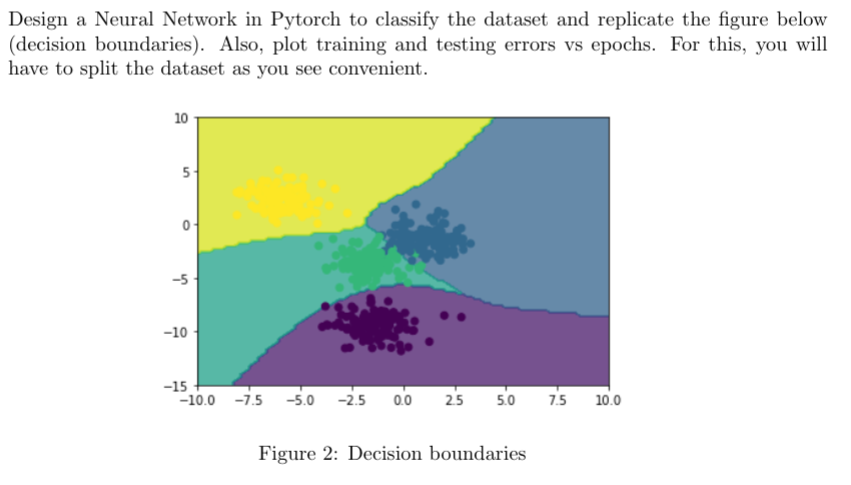

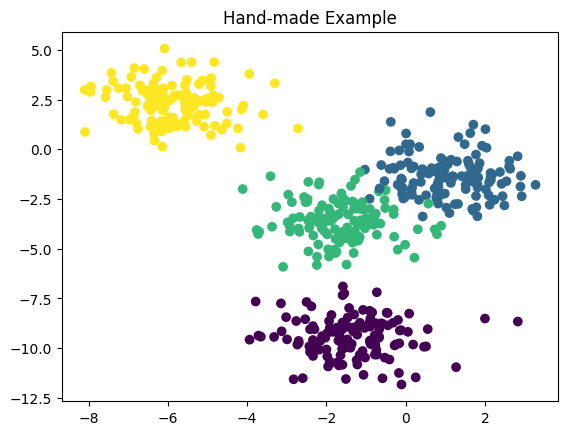

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
X,y = datasets.make_blobs(centers = 4,random_state=2,n_samples=500)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title("Hand-made Example")
plt.show()

In [5]:
import torch
from torch import nn 
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")


Using cpu device


In [10]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out
input_size = 2  # 2D points
hidden_size = 10  # Number of neurons in the hidden layer
output_size = 4  # 4 classes
# Instantiate the model, define the loss function and the optimizer
model = SimpleNN(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)



In [19]:
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
# Split the dataset into training and testing sets
dataset = TensorDataset(X_tensor, y_tensor)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
# Training loop
num_epochs = 50
train_losses = []
test_losses = []
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for points, labels in train_loader:
        # Forward pass
        outputs = model(points)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
    
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for points, labels in test_loader:
            outputs = model(points)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
    
    test_loss /= len(test_loader)
    test_losses.append(test_loss)
    if(epoch % 5 == 0 or epoch == num_epochs-1):
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

Epoch [1/50], Train Loss: 0.0478, Test Loss: 0.0491
Epoch [6/50], Train Loss: 0.0478, Test Loss: 0.0530
Epoch [11/50], Train Loss: 0.0462, Test Loss: 0.0529
Epoch [16/50], Train Loss: 0.0436, Test Loss: 0.0525
Epoch [21/50], Train Loss: 0.0436, Test Loss: 0.0514
Epoch [26/50], Train Loss: 0.0432, Test Loss: 0.0536
Epoch [31/50], Train Loss: 0.0439, Test Loss: 0.0512
Epoch [36/50], Train Loss: 0.0424, Test Loss: 0.0524
Epoch [41/50], Train Loss: 0.0446, Test Loss: 0.0521
Epoch [46/50], Train Loss: 0.0414, Test Loss: 0.0524
Epoch [50/50], Train Loss: 0.0415, Test Loss: 0.0509


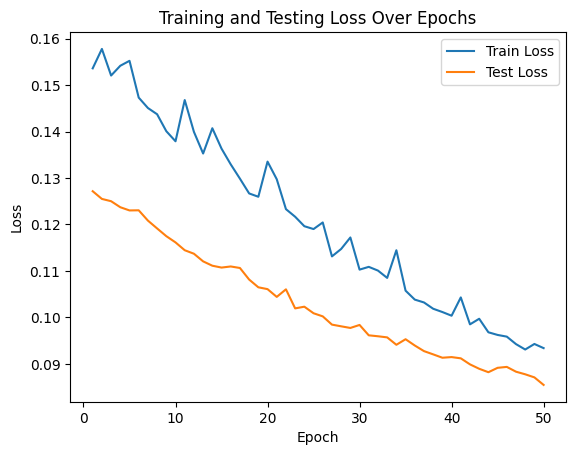

In [15]:
# Plot the training and testing error over the epochs
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss Over Epochs')
plt.legend()
plt.show()

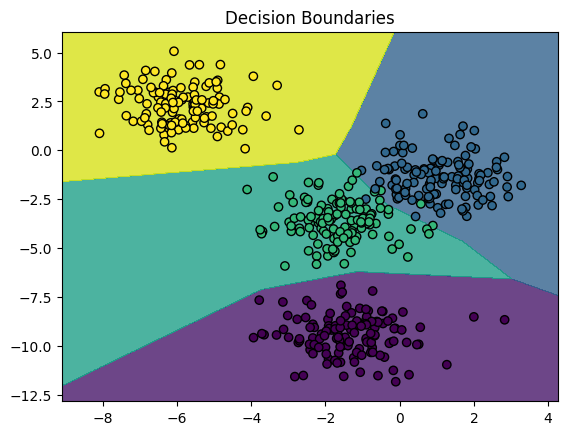

In [20]:
# Plot the decision boundaries
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_tensor = torch.tensor(grid, dtype=torch.float32)
    with torch.no_grad():
        Z = model(grid_tensor)
    Z = Z.argmax(dim=1).numpy().reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title('Decision Boundaries')
    plt.show()

plot_decision_boundary(model, X, y)